# Data Cleaning and Exploratory Analysis

In [1]:
#import packages
import pandas as pd
import numpy as np

In [2]:
#read in data
landslide_df = pd.read_csv('Global_Landslide_Catalog_Export.csv')
#look at first 3 rows
landslide_df.head(3).T

,0,1,2
source_name,AGU,Oregonian,CBS News
source_link,https://blogs.agu.org/landslideblog/2008/10/14...,http://www.oregonlive.com/news/index.ssf/2009/...,https://www.cbsnews.com/news/dozens-missing-af...
event_id,684,956,973
event_date,08/01/2008 12:00:00 AM,01/02/2009 02:00:00 AM,01/19/2007 12:00:00 AM
event_time,NaN,NaN,NaN
event_title,"Sigou Village, Loufan County, Shanxi Province","Lake Oswego, Oregon","San Ramon district, 195 miles northeast of the..."
event_description,"occurred early in morning, 11 villagers buried...",Hours of heavy rain are to blame for an overni...,(CBS/AP) At least 10 people died and as many a...
location_description,"Sigou Village, Loufan County, Shanxi Province","Lake Oswego, Oregon","San Ramon district, 195 miles northeast of the..."
location_accuracy,unknown,5km,10km
landslide_category,landslide,mudslide,landslide


In [3]:
# Remove columns not useful for modeling
landslide_df2 = landslide_df.drop(columns=['source_link', 'event_id', 'photo_link', 'submitted_date','created_date','last_edited_date'])
#look at first 3 rows
landslide_df2.head(3).T

,0,1,2
source_name,AGU,Oregonian,CBS News
event_date,08/01/2008 12:00:00 AM,01/02/2009 02:00:00 AM,01/19/2007 12:00:00 AM
event_time,NaN,NaN,NaN
event_title,"Sigou Village, Loufan County, Shanxi Province","Lake Oswego, Oregon","San Ramon district, 195 miles northeast of the..."
event_description,"occurred early in morning, 11 villagers buried...",Hours of heavy rain are to blame for an overni...,(CBS/AP) At least 10 people died and as many a...
location_description,"Sigou Village, Loufan County, Shanxi Province","Lake Oswego, Oregon","San Ramon district, 195 miles northeast of the..."
location_accuracy,unknown,5km,10km
landslide_category,landslide,mudslide,landslide
landslide_trigger,rain,downpour,downpour
landslide_size,large,small,large


In [4]:
#look at missing data per column
landslide_df2.isna().sum()

source_name                      0
event_date                       0
event_time                   11033
event_title                      0
event_description              862
location_description           102
location_accuracy                2
landslide_category               1
landslide_trigger               23
landslide_size                   9
landslide_setting               69
fatality_count                1385
injury_count                  5674
storm_name                   10456
notes                        10716
event_import_source           1563
event_import_id               1562
country_name                  1562
country_code                  1564
admin_division_name           1637
admin_division_population     1562
gazeteer_closest_point        1563
gazeteer_distance             1562
longitude                        0
latitude                         0
dtype: int64

Since `event_time`has only missing data, we will drop this column.  
`storm_name` and `notes` have a lot of missing data so we will drop these columns as well.  
`injury_count` has almost 50% missing data but I am hesitant to drop this column since I think it might be a good predictor.

In [5]:
landslide_df3 = landslide_df2.drop(columns = ['event_time', 'storm_name', 'notes', 'event_import_source', 'event_import_id'])
#look at first 3 rows
landslide_df3.head(3).T

,0,1,2
source_name,AGU,Oregonian,CBS News
event_date,08/01/2008 12:00:00 AM,01/02/2009 02:00:00 AM,01/19/2007 12:00:00 AM
event_title,"Sigou Village, Loufan County, Shanxi Province","Lake Oswego, Oregon","San Ramon district, 195 miles northeast of the..."
event_description,"occurred early in morning, 11 villagers buried...",Hours of heavy rain are to blame for an overni...,(CBS/AP) At least 10 people died and as many a...
location_description,"Sigou Village, Loufan County, Shanxi Province","Lake Oswego, Oregon","San Ramon district, 195 miles northeast of the..."
location_accuracy,unknown,5km,10km
landslide_category,landslide,mudslide,landslide
landslide_trigger,rain,downpour,downpour
landslide_size,large,small,large
landslide_setting,mine,unknown,unknown


In [6]:
#look at missing data per column
landslide_df3.isna().sum()

source_name                     0
event_date                      0
event_title                     0
event_description             862
location_description          102
location_accuracy               2
landslide_category              1
landslide_trigger              23
landslide_size                  9
landslide_setting              69
fatality_count               1385
injury_count                 5674
country_name                 1562
country_code                 1564
admin_division_name          1637
admin_division_population    1562
gazeteer_closest_point       1563
gazeteer_distance            1562
longitude                       0
latitude                        0
dtype: int64

In [7]:
#view data frame
landslide_df3


,source_name,event_date,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,country_name,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,longitude,latitude
0,AGU,08/01/2008 12:00:00 AM,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,rain,large,mine,11.0,NaN,China,CN,Shaanxi,0.0,Jingyang,41.02145,107.450000,32.562500
1,Oregonian,01/02/2009 02:00:00 AM,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,downpour,small,unknown,0.0,NaN,United States,US,Oregon,36619.0,Lake Oswego,0.60342,-122.663000,45.420000
2,CBS News,01/19/2007 12:00:00 AM,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,downpour,large,unknown,10.0,NaN,Peru,PE,Junín,14708.0,San Ramón,0.85548,-75.358700,-11.129500
3,Reuters,07/31/2009 12:00:00 AM,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,monsoon,medium,unknown,1.0,NaN,Nepal,NP,Mid Western,20908.0,Dailekh,0.75395,81.708000,28.837800
4,The Freeman,10/16/2010 12:00:00 PM,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,tropical_cyclone,medium,unknown,0.0,NaN,Philippines,PH,Central Visayas,798634.0,Cebu City,2.02204,123.897800,10.333600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,The Jakarta Post,04/01/2017 01:34:00 PM,Major landslide in Banaran,Landslide exacerbated by deforestation and bad...,"Banaran, Ponorogo, Jawa Timur, Indonesia",5km,landslide,rain,medium,natural_slope,27.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,111.679944,-7.853409
11029,Greater Kashmir,03/25/2017 05:32:00 PM,Barnari Sigdi Landslide,Two teenage girls died after they were buried ...,"Barnari Sigdi area, Tehsil Mughalmaidan, Kisht...",5km,landslide,other,small,natural_slope,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,75.680611,33.403080
11030,NBC Daily,12/15/2016 05:00:00 AM,Landslide at Pub Sarania Hill,An octogenarian was killed when a sudden lands...,"Pub Sarania Hill, Guwahati, Assam, India",1km,landslide,unknown,small,urban,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,91.772042,26.181606
11031,AGU Landslide Blog,04/29/2017 07:03:00 PM,Mayor landslide at Ayu village,Landslide triggered by heavy rainfall buried 1...,"Ayu, Ozgon, Osh, Kyrgyzstan",1km,translational_slide,downpour,large,natural_slope,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.472379,40.886395


In [8]:
#impute some data
#we will replace missing event descriptions with the event titles and missing location descriptions with the country name, while this may cause some columns to be correlated, it makes the most sense for imputing the data as I don't wish to drop any data here
landslide_df3['event_description'] = landslide_df3['event_description'].fillna(landslide_df3['event_title'])
landslide_df3['location_description'] = landslide_df3['country_name'].fillna(landslide_df3['event_title'])

#view missing counts again:
landslide_df3.isna().sum()

source_name                     0
event_date                      0
event_title                     0
event_description               0
location_description            0
location_accuracy               2
landslide_category              1
landslide_trigger              23
landslide_size                  9
landslide_setting              69
fatality_count               1385
injury_count                 5674
country_name                 1562
country_code                 1564
admin_division_name          1637
admin_division_population    1562
gazeteer_closest_point       1563
gazeteer_distance            1562
longitude                       0
latitude                        0
dtype: int64

In [9]:
#change location accuracy to numeric by dropping 'km'
landslide_df4 = landslide_df3
landslide_df4['location_accuracy'] = landslide_df3['location_accuracy'].str.replace('km', '').replace('unknown', np.nan)
#force to numeric
landslide_df4['location_accuracy']= pd.to_numeric(landslide_df4['location_accuracy'], errors= 'coerce')
#get mean 
loc_acc_avg = landslide_df4['location_accuracy'].mean()
#replace missing values with mean
landslide_df4['location_accuracy'] = landslide_df4['location_accuracy'].fillna(loc_acc_avg)


In [10]:
#impute landslide cateory with mode
landslide_df5 = landslide_df4
landslide_df5['landslide_category'] = landslide_df5['landslide_category'].fillna(landslide_df4['landslide_category'].mode()[0])
#impute landslide trigger with mode
landslide_df5['landslide_trigger'] = landslide_df5['landslide_trigger'].fillna(landslide_df4['landslide_trigger'].mode()[0])
#impute landslide size with mode
landslide_df5['landslide_size'] = landslide_df5['landslide_size'].fillna(landslide_df4['landslide_size'].mode()[0])

In [11]:
landslide_df5['landslide_setting'] = landslide_df5['landslide_setting'].astype('category')
landslide_df5['landslide_setting'].cat.categories

Index(['above_coast', 'above_river', 'above_road', 'below_road', 'bluff',
       'burned_area', 'deforested_slope', 'engineered_slope', 'mine',
       'natural_slope', 'other', 'retaining_wall', 'unknown', 'urban'],
      dtype='object')

In [12]:
#replace missing setting with level unknown
landslide_df5['landslide_setting'] = landslide_df5['landslide_setting'].fillna('unknown')

In [13]:
# the remaining missing data seems to overlap a lot. While I could impute the country names/codes from the latitude and longitude I don't know enough about the data to imput the admin_division_names populations, and gazeeter attributes so I will drop all of these columns.
cols_drop = ['admin_division_name', 'admin_division_population', 'gazeteer_closest_point', 'gazeteer_distance']
landslide_df6 = landslide_df5.dropna(subset=cols_drop)

In [14]:
#view missing counts again
landslide_df6.isna().sum()

source_name                     0
event_date                      0
event_title                     0
event_description               0
location_description            0
location_accuracy               0
landslide_category              0
landslide_trigger               0
landslide_size                  0
landslide_setting               0
fatality_count               1323
injury_count                 5524
country_name                    0
country_code                    2
admin_division_name             0
admin_division_population       0
gazeteer_closest_point          0
gazeteer_distance               0
longitude                       0
latitude                        0
dtype: int64

In [15]:
#impute the 2 missing country codes from their country names
landslide_df6[landslide_df6['country_code'].isna()]
landslide_df6[landslide_df6['country_name'] == 'Namibia']
#since there are only 2 namibia entries with no country code I will replace the na with NAM
landslide_df6['country_code'] = landslide_df6['country_code'].fillna('NAM')

/var/folders/42/069x05gj0h785d4_lrjy8mhw0000gn/T/ipykernel_78320/1784345671.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  landslide_df6['country_code'] = landslide_df6['country_code'].fillna('NAM')


In [128]:
#separate out the data frame with unknow fatality and unknown injury

fatality_unknown = landslide_df6[landslide_df6['fatality_count'].isna()]
fatality_unknown = fatality_unknown.drop(columns=['fatality_count', 'injury_count'])

injury_unknown = landslide_df6[landslide_df6['injury_count'].isna()]
injury_unknown = injury_unknown.drop(columns=['fatality_count', 'injury_count'])

In [16]:
landslide_df6.to_csv('landslides_clean_full.csv')

In [129]:
# get dataframe for predicting with no missing values for injury or fatality

cols_drop = ['fatality_count', 'injury_count']

landslide_clean = landslide_df6.dropna(subset=cols_drop)



In [130]:
landslide_clean.isna().sum()

source_name                  0
event_date                   0
event_title                  0
event_description            0
location_description         0
location_accuracy            0
landslide_category           0
landslide_trigger            0
landslide_size               0
landslide_setting            0
fatality_count               0
injury_count                 0
country_name                 0
country_code                 0
admin_division_name          0
admin_division_population    0
gazeteer_closest_point       0
gazeteer_distance            0
longitude                    0
latitude                     0
dtype: int64

Next I need to deal with some of the columns that aren't categorical but are more of decriptions to see if I  can sort them into categories. For example, if a bunch of `event_descriptions` mention deaths, I and put them all in a category called deaths or something like that. This may be feasible, It may not be. we shall see...

In [131]:
#export the cleaned dfs to csvs
landslide_clean.to_csv('landslide_clean.csv')

# random forest for modeling

In [132]:
# import packages
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [133]:
# prepare training data
landlide_fatality_train = landslide_df6.drop(columns = 'injury_count')
len(landlide_fatality_train)


9395

In [134]:
#drop the missing fatality count
landlide_fatality_train = landlide_fatality_train.dropna(subset='fatality_count')
#drop columns not used for modeling
landlide_fatality_train = landlide_fatality_train.drop(columns= ['source_name', 'event_title', 'event_description', 'country_name', 'event_date', 'location_description', 'gazeteer_closest_point', 'admin_division_name'])

In [135]:
# code zeros and 1s for if there were deaths or not
landlide_fatality_train['deaths'] = (landlide_fatality_train['fatality_count']>0).astype(int)
#drop fatality column
landlide_fatality_train_deaths = landlide_fatality_train.drop(columns = 'fatality_count')
landlide_fatality_train_deaths

,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,country_code,admin_division_population,gazeteer_distance,longitude,latitude,deaths
0,12.674393,landslide,rain,large,mine,CN,0.0,41.02145,107.4500,32.5625,1
1,5.000000,mudslide,downpour,small,unknown,US,36619.0,0.60342,-122.6630,45.4200,0
2,10.000000,landslide,downpour,large,unknown,PE,14708.0,0.85548,-75.3587,-11.1295,1
3,12.674393,landslide,monsoon,medium,unknown,NP,20908.0,0.75395,81.7080,28.8378,1
4,5.000000,landslide,tropical_cyclone,medium,unknown,PH,798634.0,2.02204,123.8978,10.3336,0
...,...,...,...,...,...,...,...,...,...,...,...
9879,25.000000,landslide,downpour,medium,unknown,PH,6408.0,3.58504,124.7962,6.3879,0
9889,25.000000,landslide,downpour,medium,unknown,PH,31089.0,1.62917,124.7333,6.3666,0
9939,10.000000,landslide,tropical_cyclone,medium,unknown,PH,16671.0,0.86072,125.9667,7.6000,0
10005,12.674393,landslide,downpour,small,unknown,US,4534.0,4.80321,-122.9542,38.4738,0


In [136]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier


In [137]:
#encode landslide size
replace_map={'very_large':4,
             'large':3,
             'medium':2,
             'small': 1,
             'unknown': 0}
landlide_fatality_train_deaths['landslide_size'] = landlide_fatality_train_deaths['landslide_size'].map(replace_map)


In [138]:
categorical_features = ['landslide_category', 'landslide_trigger', 'country_code', 'landslide_setting']

categorical_transformer = Pipeline(steps=[
    
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])


In [139]:
#split data into x and y
x_deaths_train = landlide_fatality_train_deaths.drop(columns='deaths')
y_deaths_train = landlide_fatality_train_deaths['deaths']


In [140]:
landlide_fatality_train_count = landlide_fatality_train_deaths[landlide_fatality_train_deaths['deaths'] == 1]

In [141]:
landlide_fatality_train_count = landlide_fatality_train_count.drop(columns = 'deaths')
landlide_fatality_train_count['fatality_count'] = landlide_fatality_train['fatality_count']

In [142]:
x_fatality_train = landlide_fatality_train_count.drop(columns='fatality_count')
y_fatality_train = landlide_fatality_train_count['fatality_count']
x_fatality_train

,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,country_code,admin_division_population,gazeteer_distance,longitude,latitude
0,12.674393,landslide,rain,3,mine,CN,0.0,41.02145,107.4500,32.5625
2,10.000000,landslide,downpour,3,unknown,PE,14708.0,0.85548,-75.3587,-11.1295
3,12.674393,landslide,monsoon,2,unknown,NP,20908.0,0.75395,81.7080,28.8378
7,10.000000,complex,tropical_cyclone,2,unknown,MX,3191.0,10.88351,-107.6220,24.9531
9,10.000000,complex,downpour,2,unknown,CN,0.0,55.18512,100.0845,23.8900
...,...,...,...,...,...,...,...,...,...,...
9855,12.674393,unknown,monsoon,0,unknown,NP,21867.0,10.27271,83.8669,28.0095
9856,12.674393,landslide,downpour,2,unknown,ID,0.0,12.63607,120.4130,0.7770
9867,5.000000,mudslide,downpour,2,unknown,BR,386069.0,0.10215,-46.4614,-23.6687
9872,25.000000,landslide,rain,2,unknown,IN,2000.0,3.80164,91.7986,26.1699


In [143]:
pipeline.fit(x_deaths_train, y_deaths_train)
predictions = pipeline.predict(x_deaths_train)

In [144]:
#fit for fatality counts 
pipeline.fit(x_fatality_train, y_fatality_train)
preds_fatality_count = pipeline.predict(x_fatality_train)

In [145]:
import sklearn.metrics


rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_fatality_train, preds_fatality_count))

In [146]:
print(rmse)

42.99731613687541


This is a low rmse so this model is likely good at prediction for deaths or no deaths.
We could try differnt tuning parameters if we wanted to improve the model even more.

In [147]:
#predict on unknown deaths data

#drop columns
deaths_unknown = fatality_unknown.drop(columns= ['source_name', 'event_title', 'event_description', 'country_name', 'event_date', 'location_description', 'gazeteer_closest_point', 'admin_division_name'])



In [148]:
#fix landslide size
deaths_unknown['landslide_size'] = deaths_unknown['landslide_size'].map(replace_map)

In [52]:
unknown_preds = pipeline.predict(deaths_unknown)

In [62]:
unknown_preds_df = pd.DataFrame(unknown_preds)
unknown_preds_df = unknown_preds_df.rename(columns={0:'preds'})
#df.rename(columns={'old_name': 'new_name'}, inplace=True)


In [84]:
deaths_unknown['preds'] = unknown_preds
fatality_unknown = deaths_unknown[deaths_unknown['preds']==1]
fatality_unknown= fatality_unknown.drop(columns='preds')

In [85]:
fat_unknown_preds = pipeline.predict(fatality_unknown)

In [87]:
from matplotlib import pyplot as plt

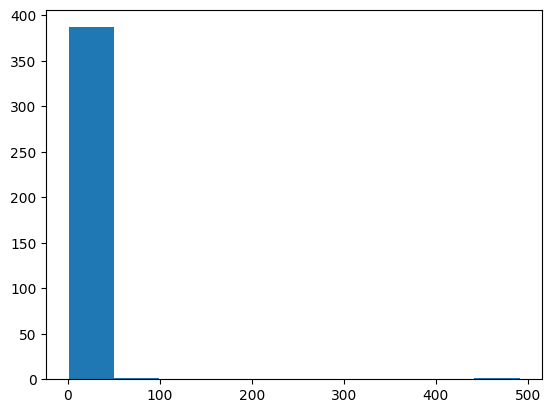

In [88]:
plt.hist(fat_unknown_preds)
plt.show()

In [89]:
fatality_unknown_with_pred = fatality_unknown
fatality_unknown_with_pred['fatality_pred'] = fat_unknown_preds

In [90]:
fatality_unknown_with_pred

,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,country_code,admin_division_population,gazeteer_distance,longitude,latitude,fatality_pred
459,12.674393,complex,rain,2,unknown,PE,0.0,12.26171,-75.4267,-10.3838,7.0
463,50.000000,landslide,downpour,2,unknown,NP,0.0,4.91296,81.3333,29.0833,1.0
477,25.000000,landslide,rain,3,unknown,BR,153361.0,0.19081,-42.5329,-22.2815,1.0
493,50.000000,landslide,rain,2,unknown,PH,0.0,12.76242,125.4498,7.8098,1.0
526,50.000000,complex,tropical_cyclone,2,unknown,PH,9636.0,2.85869,120.6000,18.2300,2.0
...,...,...,...,...,...,...,...,...,...,...,...
9776,5.000000,landslide,rain,2,unknown,PG,8186.0,19.67416,142.8548,-6.0609,5.0
9785,1.000000,landslide,downpour,2,unknown,ID,79714.0,9.51714,98.8162,1.8203,1.0
9812,50.000000,landslide,rain,2,unknown,PH,8235.0,7.91544,125.5986,7.8339,1.0
10071,5.000000,landslide,monsoon,2,unknown,ID,0.0,5.31222,123.2322,0.4257,1.0


In [111]:
len(deaths_unknown)

1324

In [94]:
len(fatality_unknown_with_pred)

389

In [149]:
fat_count = pd.DataFrame(fat_unknown_preds)
fat_count=fat_count.rename(columns={0:'preds'})

In [150]:
deaths_unknown['fatality_count_predictions'] = deaths_unknown.index.to_series().map(fat_count['preds']).reindex(deaths_unknown.index)


In [151]:
deaths_unknown['fatality_count_predictions'] = deaths_unknown['fatality_count_predictions'].fillna(0)

In [152]:
deaths_unknown

,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,country_code,admin_division_population,gazeteer_distance,longitude,latitude,fatality_count_predictions
8,5.0,mudslide,rain,2,unknown,US,2689.0,4.51471,-114.4194,43.6846,1.0
48,10.0,mudslide,downpour,2,unknown,US,2369.0,23.55928,-132.7269,56.5561,1.0
49,5.0,mudslide,downpour,2,unknown,US,2369.0,24.61520,-132.7348,56.5692,1.0
50,5.0,mudslide,downpour,2,unknown,US,2369.0,16.55139,-132.5617,56.5787,7.0
97,10.0,landslide,downpour,3,unknown,US,2514.0,14.54271,-124.0100,42.9744,4.0
...,...,...,...,...,...,...,...,...,...,...,...
9848,25.0,landslide,unknown,2,unknown,CM,43509.0,0.00369,10.2667,6.2500,0.0
9864,50.0,landslide,downpour,2,unknown,PA,1287.0,1.84596,-79.4295,9.1559,0.0
9870,10.0,complex,rain,2,unknown,US,11698.0,3.22050,-117.6428,33.7112,0.0
10071,5.0,landslide,monsoon,2,unknown,ID,0.0,5.31222,123.2322,0.4257,0.0


In [153]:
deaths_unknown.to_csv('Predicted_fatalities.csv')